#### 1. Import the lib's

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from kmeans import KMeans
import pandas as pd
import sklearn


#### 2. Make our own custom class for the kmeans

In [29]:
class KMeans:
    
    # Initialize the constructor
    def __init__(self,n_clusters=2,max_iter=300):
        
        # Assign the clusters
        self.n_clusters = n_clusters
        
        # Initialize the max_iterations
        self.max_iter = max_iter
        
        # initialize the centroids
        self.centroids = None
        
    # Define the fit_predict
    def fit_predict(self,X):

        # Extract the random index
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        
        # Make the random index as a centroid
        self.centroids = X[random_index]

        # Iterate till the max_iterations
        for i in range(self.max_iter):
            
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            
            # check finish
            if (old_centroids == self.centroids).all():
                break

        # Finally return the cluster group
        return cluster_group

    # Define the assign clusters
    def assign_clusters(self,X):
        
        # Create the cluster_group
        cluster_group = []
        
        # Create the distances list
        distances = []

        # Travel for each row
        for row in X:
            
            # Compute the centroid for each point
            for centroid in self.centroids:
                
                # Now append this centroid as a scalar value in distance list
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            
            # Extract the min distances
            min_distance = min(distances)
            
            # Extract the index_position in the distances array
            index_pos = distances.index(min_distance)
            
            # Append it to the cluster group
            cluster_group.append(index_pos)
            
            # Now after this iteration clear the distances array
            distances.clear()

        # Fianlly return the cluster_group after converting into array
        return np.array(cluster_group)

    # Define the move centroids
    def move_centroids(self,X,cluster_group):
        
        # Define a new list of centroids
        new_centroids = []

        # Extract the unique clusters from the cluster_group
        cluster_type = np.unique(cluster_group)

        # Iterate on the cluster group
        for type in cluster_type:
            
            # Append mean to the new centroid
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        # Finally return the new_centroids
        return np.array(new_centroids)


#### 3. Importing the dataset

In [30]:
df= pd.read_csv('sc.csv')
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


#### 4. Import the kmeans

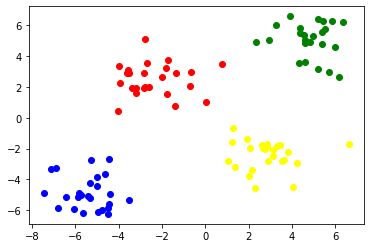

In [36]:
import random
km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()